Main

Predicciones completas:
      solar_electricity  wind_electricity  hydro_electricity  \
0         -4.727270e-17          0.000000      -5.899983e-17   
1         -4.727270e-17          0.000000      -5.899983e-17   
2         -4.727270e-17          0.000000      -5.899983e-17   
3         -4.727270e-17          0.000000      -4.179749e-01   
4         -2.181491e-01         -0.272910      -4.760076e-01   
5         -2.181491e-01         -0.278477      -5.001555e-01   
6         -2.181491e-01         -0.278477      -4.972181e-01   
7         -4.727270e-17          0.000000      -5.899983e-17   
8         -4.727270e-17          0.000000      -5.899983e-17   
9         -2.181491e-01         -0.278477      -4.739137e-01   
10        -2.181491e-01         -0.278477      -4.387896e-01   
11        -4.727270e-17          0.000000      -5.899983e-17   
12        -4.727270e-17          0.000000      -5.899983e-17   
13        -2.170295e-01         -0.125137      -4.803429e-01   
14        -4.727

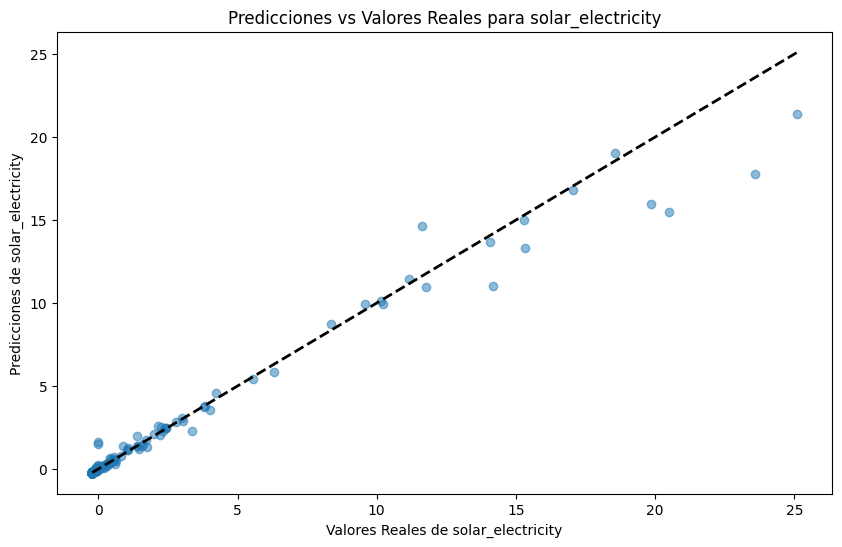

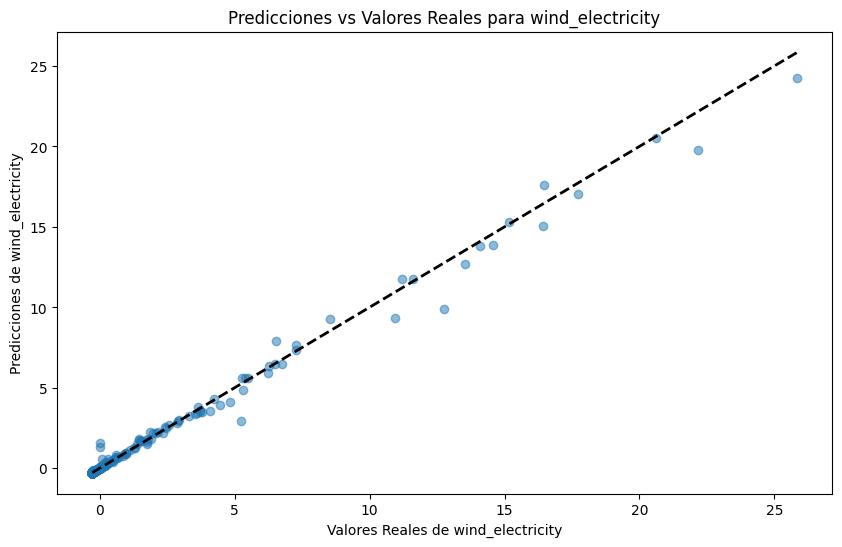

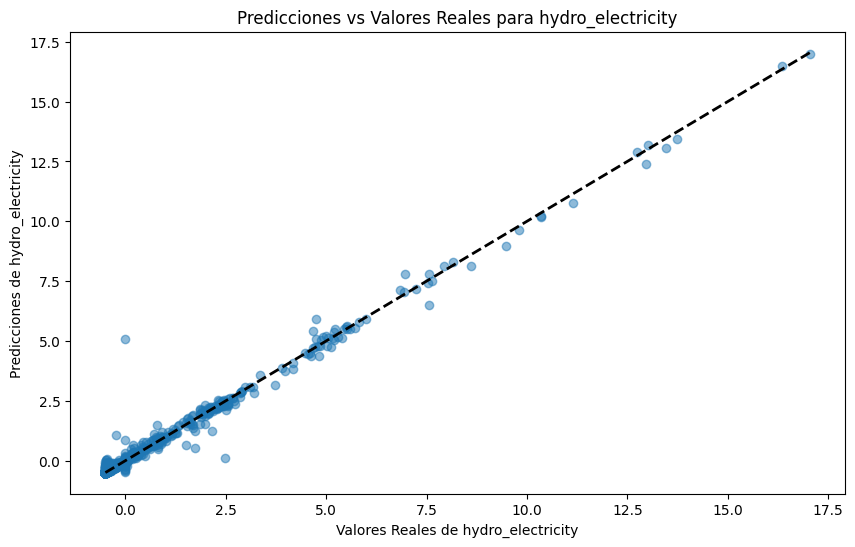

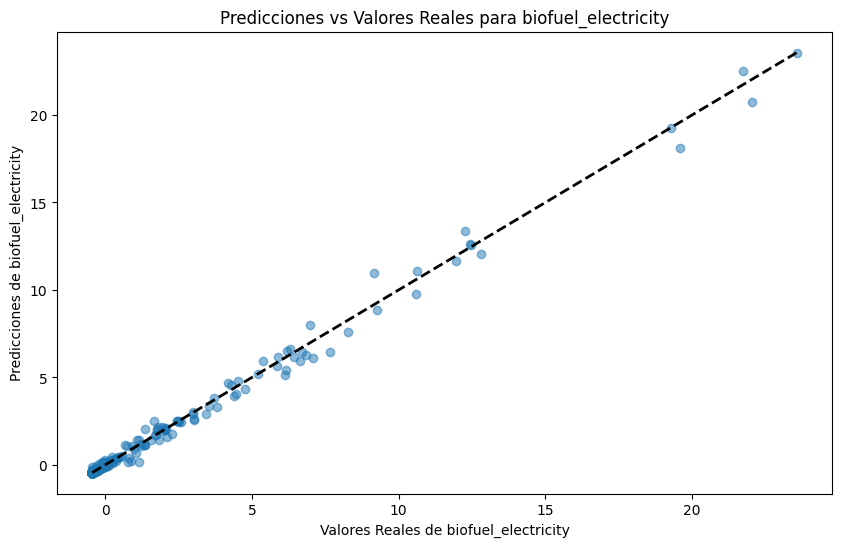

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
from functions2 import load_and_clean_data

# Configurar Pandas para mostrar todos los resultados
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Cargar y limpiar los datos
df = load_and_clean_data('data/raw/owid-energy-data.csv')

# 2. Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# 3. Aplicar Label Encoding a las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Separar características y variables objetivo
target_columns = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 5. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor())

# 7. Entrenar el modelo
model.fit(X_train, y_train)

# 8. Realizar predicciones
y_pred = pd.DataFrame(model.predict(X_test), columns=target_columns)

# Mostrar las predicciones completas
print("Predicciones completas:")
print(y_pred)

# 9. Comparar las predicciones con los valores reales mediante gráficas
for col in target_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[col], y_pred[col], alpha=0.5)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'k--', lw=2)
    plt.xlabel(f"Valores Reales de {col}")
    plt.ylabel(f"Predicciones de {col}")
    plt.title(f"Predicciones vs Valores Reales para {col}")
    plt.show()


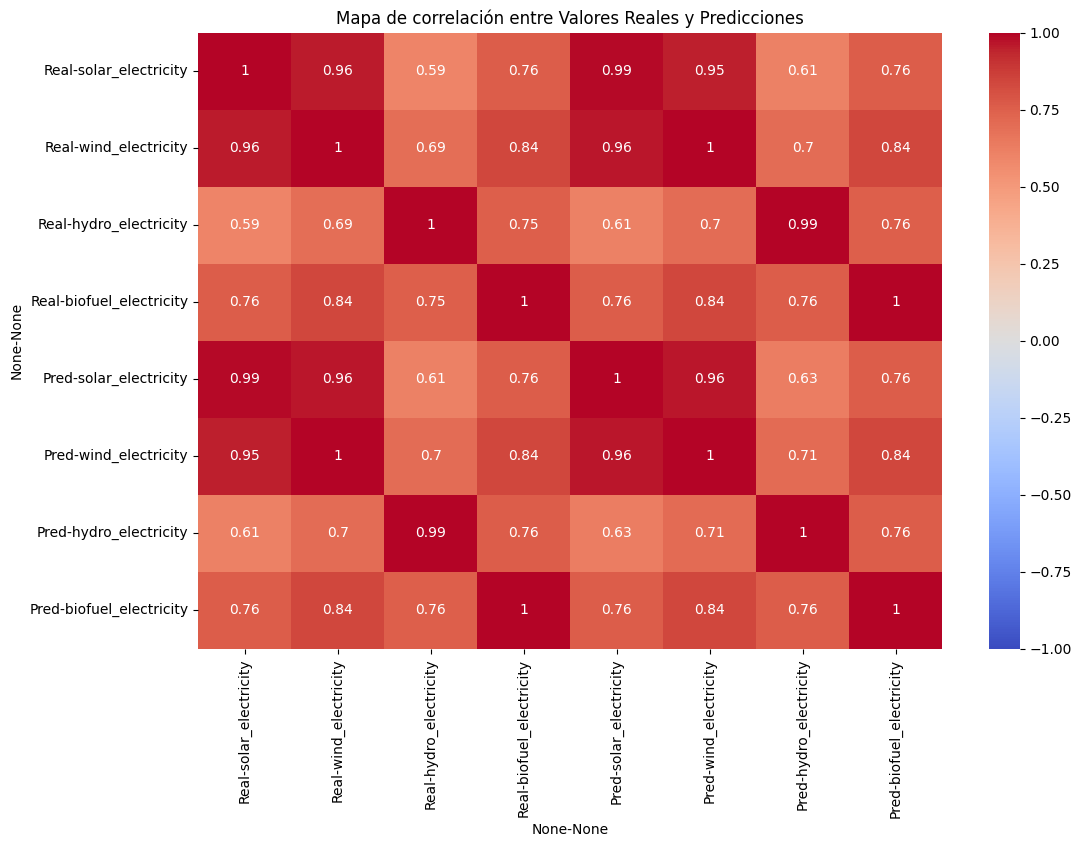

In [3]:
# 10. Mapa de correlación
# Crear un DataFrame combinado con valores reales y predicciones
combined_df = pd.concat([y_test.reset_index(drop=True), y_pred], axis=1, keys=['Real', 'Pred'])

# Calcular la correlación
correlation_matrix = combined_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de correlación entre Valores Reales y Predicciones")
plt.show()

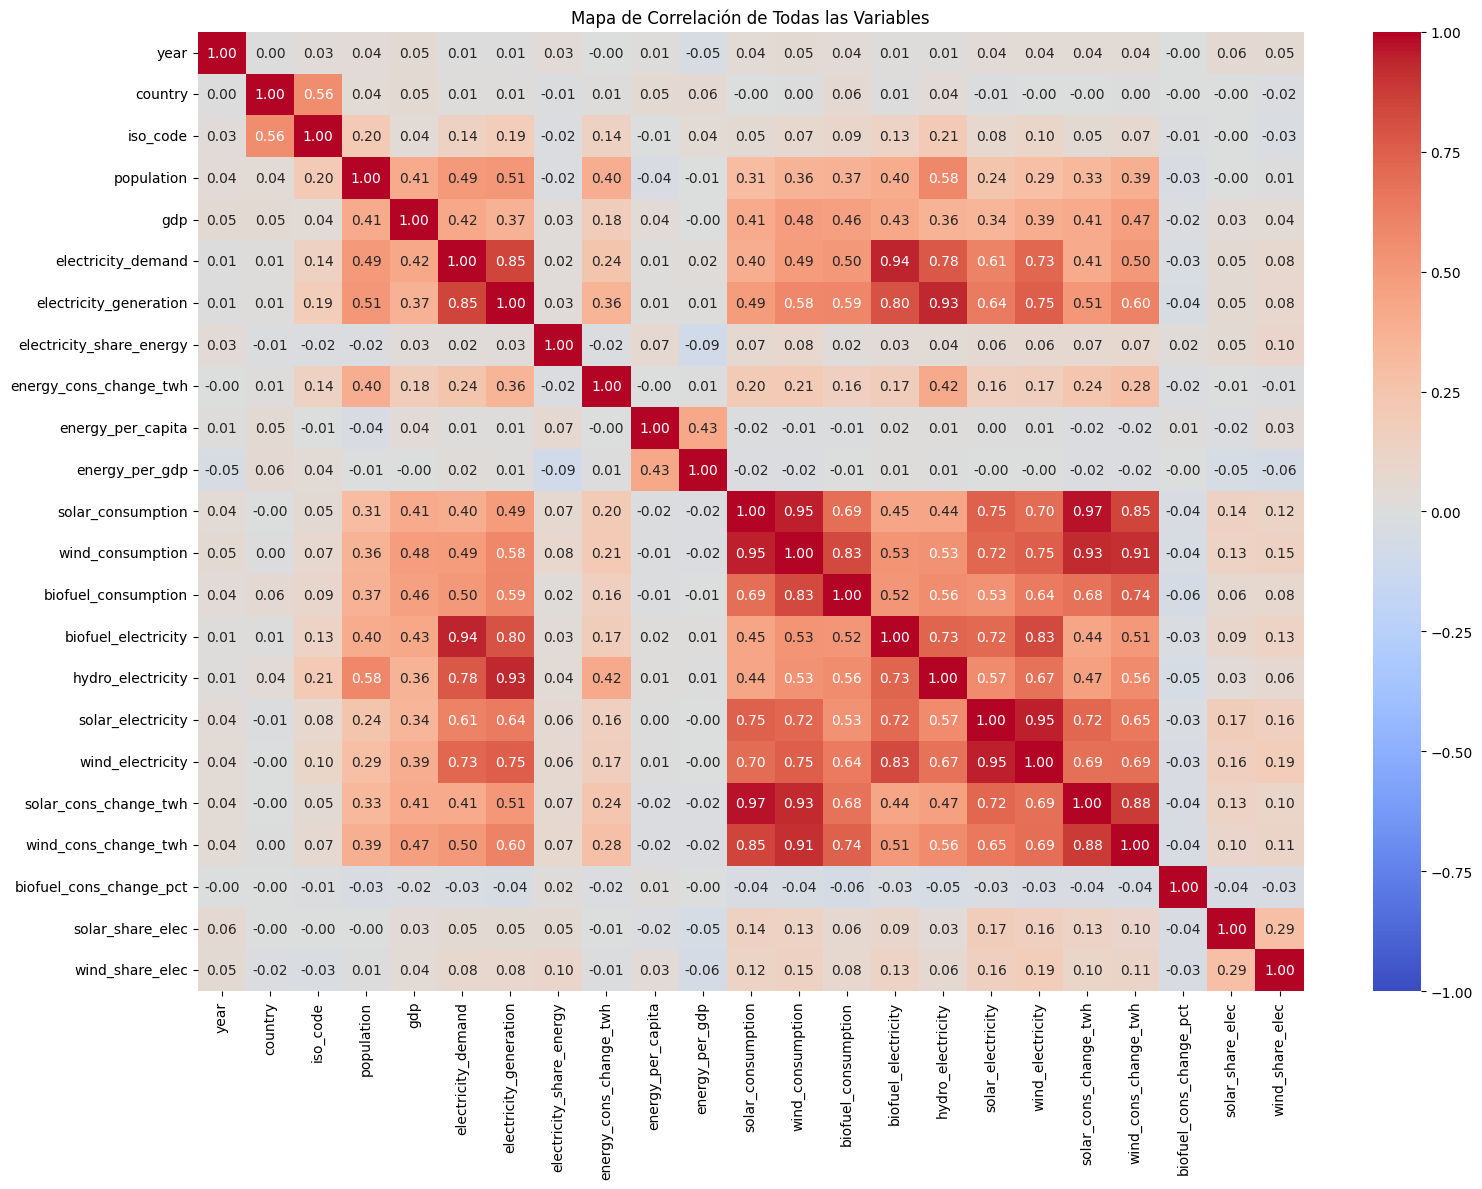

In [6]:
# 1. Calcular la matriz de correlación
correlation_matrix = df.corr()

# 2. Configuración del gráfico
plt.figure(figsize=(16, 12))

# 3. Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# 4. Personalizar el gráfico
plt.title("Mapa de Correlación de Todas las Variables")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# 5. Mostrar el gráfico
plt.show()

In [10]:
combined_df.columns

MultiIndex([('Real',   'solar_electricity'),
            ('Real',    'wind_electricity'),
            ('Real',   'hydro_electricity'),
            ('Real', 'biofuel_electricity'),
            ('Pred',   'solar_electricity'),
            ('Pred',    'wind_electricity'),
            ('Pred',   'hydro_electricity'),
            ('Pred', 'biofuel_electricity')],
           )

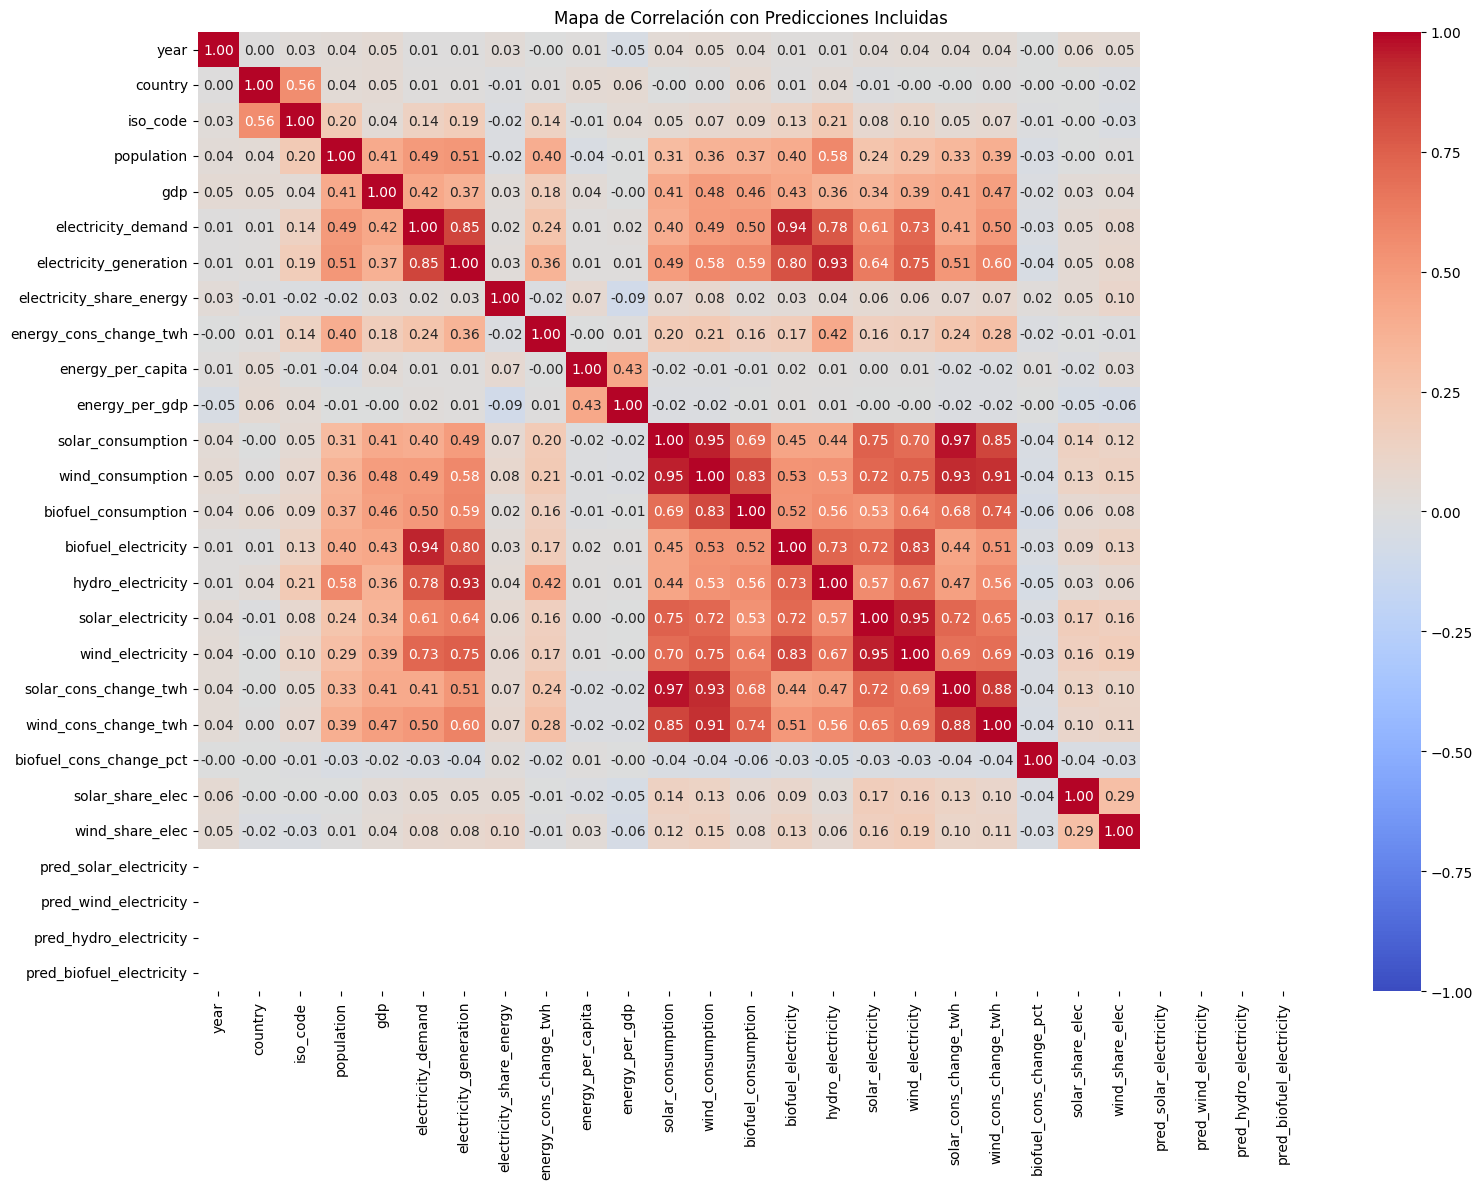

In [17]:
# Supongamos que y_pred es el resultado de tus predicciones
# Convertimos y_pred a un DataFrame con nombres de columnas adecuados
predictions_df = pd.DataFrame(y_pred, columns=[f'pred_{col}' for col in target_columns])  # Renombrar las columnas

# 1. Concatenar el DataFrame original y las predicciones
df_with_predictions = pd.concat([df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

# 2. Calcular la matriz de correlación
correlation_matrix_with_predictions = df_with_predictions.corr()

# 3. Configuración del gráfico
plt.figure(figsize=(16, 12))

# 4. Crear el mapa de calor
sns.heatmap(correlation_matrix_with_predictions, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# 5. Personalizar el gráfico
plt.title("Mapa de Correlación con Predicciones Incluidas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# 6. Mostrar el gráfico
plt.show()



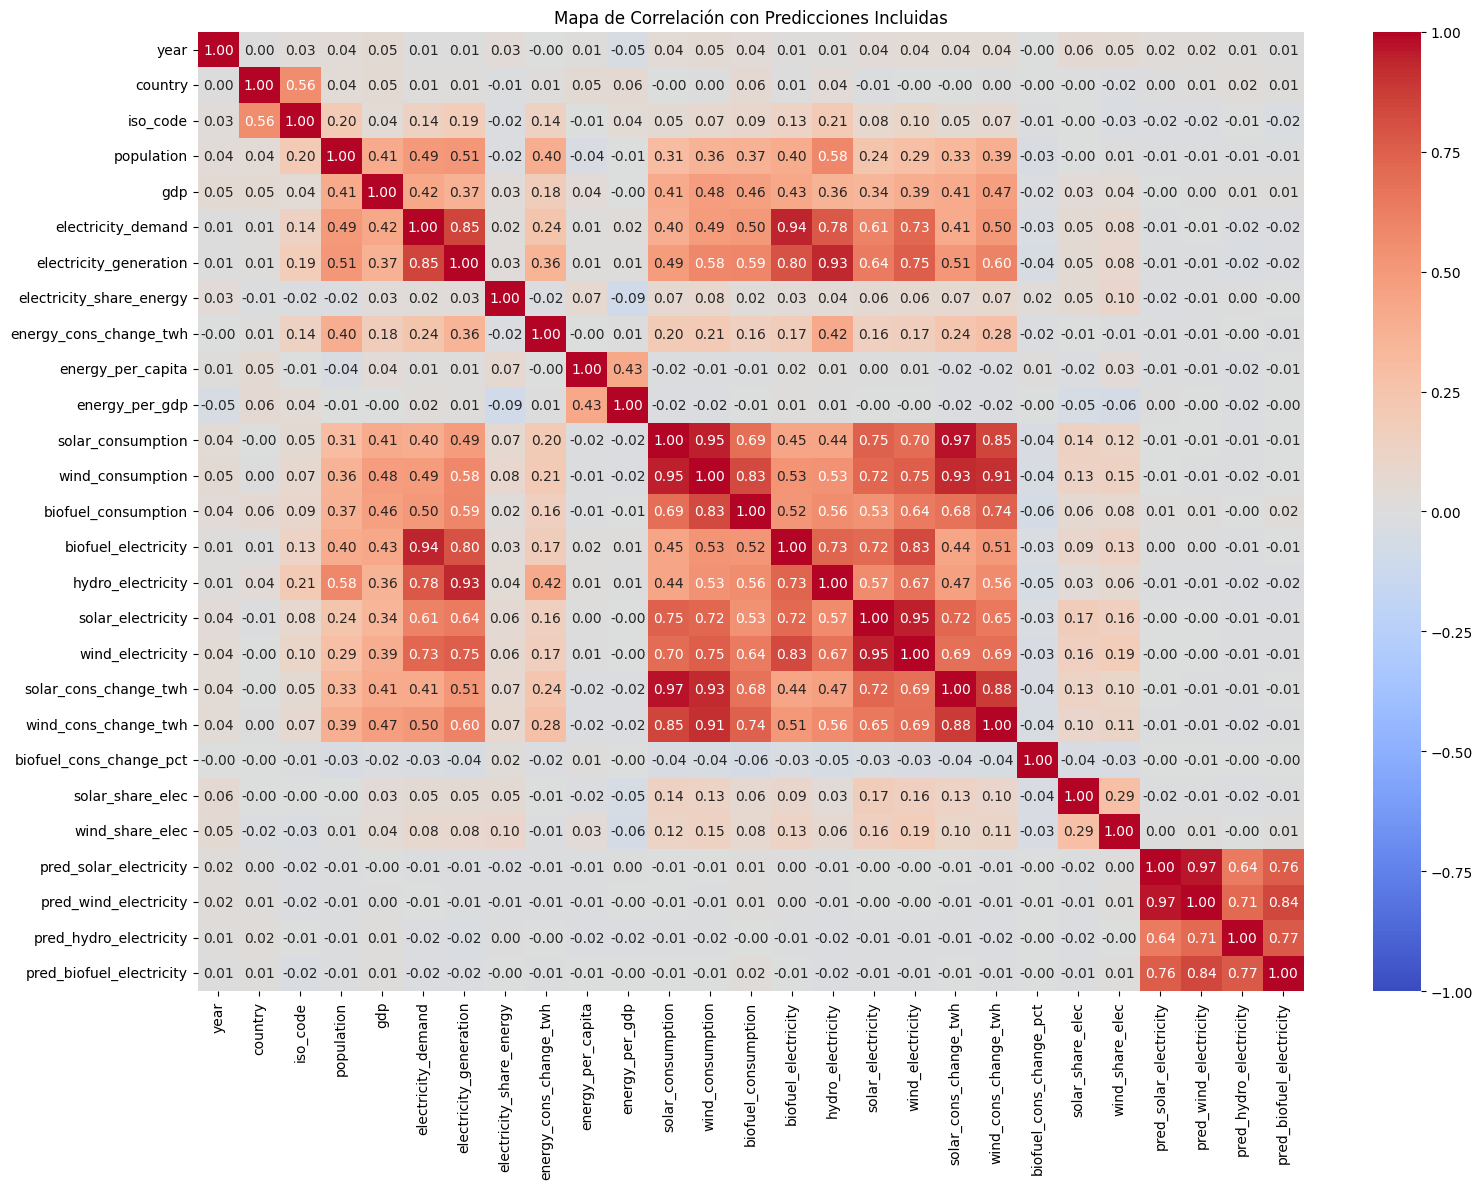

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from functions import load_and_clean_data
from sklearn.preprocessing import LabelEncoder

# Cargar y limpiar datos
df = load_and_clean_data('data/raw/owid-energy-data.csv')

# 1. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Transformar las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Separar características y variables objetivo
target_columns = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor())

# 5. Entrenar el modelo
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Crear un DataFrame de las predicciones
predictions_df = pd.DataFrame(y_pred, columns=[f'pred_{col}' for col in target_columns])

# 8. Concatenar el DataFrame original y las predicciones
df_with_predictions = pd.concat([df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

# 9. Calcular la matriz de correlación
correlation_matrix_with_predictions = df_with_predictions.corr()

# 10. Configuración del gráfico
plt.figure(figsize=(16, 12))

# 11. Crear el mapa de calor
sns.heatmap(correlation_matrix_with_predictions, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# 12. Personalizar el gráfico
plt.title("Mapa de Correlación con Predicciones Incluidas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# 13. Mostrar el gráfico
plt.show()


In [19]:
print(df_with_predictions.head())  # Muestra las primeras filas del DataFrame
print(df_with_predictions.columns)  # Muestra los nombres de las columnas


   year  country  iso_code  population           gdp  electricity_demand  \
0  2000        0       220         0.0  2.367735e-17           -0.181898   
1  2001        0       220         0.0  2.367735e-17           -0.161485   
2  2002        0       220         0.0  2.367735e-17           -0.139438   
3  2003        0       220         0.0  2.367735e-17           -0.119950   
4  2004        0       220         0.0  2.367735e-17           -0.090139   

   electricity_generation  electricity_share_energy  energy_cons_change_twh  \
0               -0.265722             -2.357949e-15           -3.986040e-17   
1               -0.248372             -2.357949e-15           -3.986040e-17   
2               -0.229634             -2.357949e-15           -3.986040e-17   
3               -0.213072             -2.357949e-15           -3.986040e-17   
4               -0.187735             -2.357949e-15           -3.986040e-17   

   energy_per_capita  energy_per_gdp  solar_consumption  wind_consum

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Ahora puedes usar X_pca para entrenar tu modelo
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Rendimiento del Modelo Original:
MAE: 0.0118
RMSE: 0.1199
R²: 0.9847


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Rendimiento del Modelo con PCA:
MAE: 0.0272
RMSE: 0.1948
R²: 0.9635

Comparación de Rendimiento:
  Metric  Original Model  PCA Model
0    MAE        0.011766   0.027175
1   RMSE        0.119863   0.194799
2     R²        0.984748   0.963536


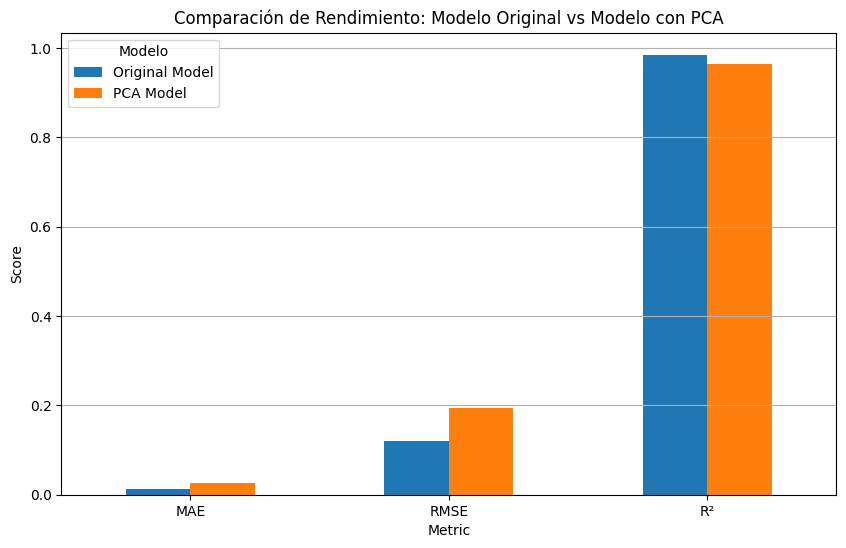

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from functions import load_and_clean_data
from sklearn.preprocessing import LabelEncoder

# Cargar y limpiar datos
df = load_and_clean_data('data/raw/owid-energy-data.csv')

# 1. Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Transformar las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Separar características y variables objetivo
target_columns = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Definir y entrenar el modelo original
model_original = MultiOutputRegressor(RandomForestRegressor())
model_original.fit(X_train, y_train)

# 5. Hacer predicciones con el modelo original
y_pred_original = model_original.predict(X_test)

# 6. Calcular métricas de rendimiento para el modelo original
mae_original = mean_absolute_error(y_test, y_pred_original)
rmse_original = mean_squared_error(y_test, y_pred_original, squared=False)
r2_original = r2_score(y_test, y_pred_original)

print("Rendimiento del Modelo Original:")
print(f"MAE: {mae_original:.4f}")
print(f"RMSE: {rmse_original:.4f}")
print(f"R²: {r2_original:.4f}")

# 7. Estandarizar las características para PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# 9. Dividir los datos en conjuntos de entrenamiento y prueba para PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 10. Definir y entrenar el modelo con PCA
model_pca = MultiOutputRegressor(RandomForestRegressor())
model_pca.fit(X_train_pca, y_train)

# 11. Hacer predicciones con el modelo PCA
y_pred_pca = model_pca.predict(X_test_pca)

# 12. Calcular métricas de rendimiento para el modelo PCA
mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False)
r2_pca = r2_score(y_test, y_pred_pca)

print("\nRendimiento del Modelo con PCA:")
print(f"MAE: {mae_pca:.4f}")
print(f"RMSE: {rmse_pca:.4f}")
print(f"R²: {r2_pca:.4f}")

# 13. Comparar los resultados
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Original Model': [mae_original, rmse_original, r2_original],
    'PCA Model': [mae_pca, rmse_pca, r2_pca]
})

print("\nComparación de Rendimiento:")
print(comparison_df)

# 14. Visualizar los resultados
comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Rendimiento: Modelo Original vs Modelo con PCA')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Modelo')
plt.grid(axis='y')
plt.show()


In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = RandomForestRegressor()

# Crear el objeto RFE y seleccionar las mejores características
selector = RFE(model, n_features_to_select=10)  # Selecciona las 10 mejores características
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['year', 'population', 'electricity_demand', 'electricity_generation',
       'energy_cons_change_twh', 'solar_consumption', 'wind_consumption',
       'biofuel_consumption', 'solar_share_elec', 'wind_share_elec'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate the selected features
X_selected = df[selected_features]
y = df[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model
model = MultiOutputRegressor(RandomForestRegressor())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


MAE: 0.0147, RMSE: 0.1242, R²: 0.9848


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


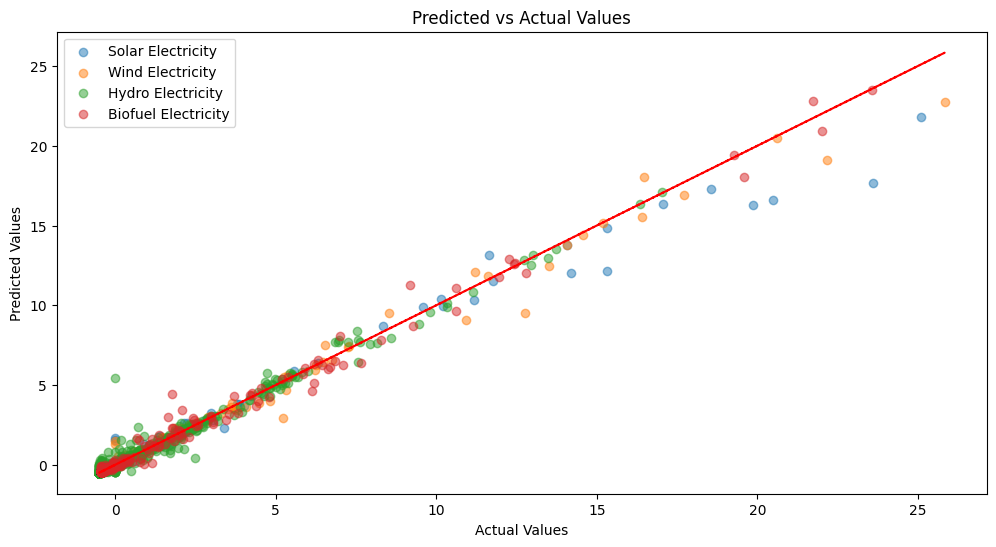

In [26]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test['solar_electricity'], y_pred[:, 0], label='Solar Electricity', alpha=0.5)
plt.scatter(y_test['wind_electricity'], y_pred[:, 1], label='Wind Electricity', alpha=0.5)
plt.scatter(y_test['hydro_electricity'], y_pred[:, 2], label='Hydro Electricity', alpha=0.5)
plt.scatter(y_test['biofuel_electricity'], y_pred[:, 3], label='Biofuel Electricity', alpha=0.5)
plt.plot([y.min() for y in y_test.values.flatten()], [y.max() for y in y_test.values.flatten()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supongamos que ya tienes X y y preparados
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un diccionario de modelos candidatos
models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor()),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor())
}

# Definir una función para evaluar cada modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# Evaluar cada modelo
results = {}
for model_name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Convertir los resultados a DataFrame para facilitar la visualización
results_df = pd.DataFrame(results).T
print(results_df)


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                        MAE      RMSE        R²
Random Forest      0.011555  0.117518  0.985184
Gradient Boosting  0.033002  0.153307  0.976024


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Función para evaluar modelos en un objetivo específico
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Para RMSE
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# Almacenar los resultados
results = {}
# Iterar sobre cada variable de salida (cada columna de y_train)
for col in range(y_train.shape[1]):
    # Extraer cada variable objetivo usando iloc para indexar
    y_train_col = y_train.iloc[:, col]
    y_test_col = y_test.iloc[:, col]

    for model_name, model in models.items():
        mae, rmse, r2 = evaluate_model(model, X_train, X_test, y_train_col, y_test_col)
        
        # Guardar resultados en el diccionario
        if model_name not in results:
            results[model_name] = {'MAE': [], 'RMSE': [], 'R²': []}
        
        results[model_name]['MAE'].append(mae)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['R²'].append(r2)

# Promediar resultados
for model_name, metrics in results.items():
    results[model_name]['MAE'] = sum(metrics['MAE']) / len(metrics['MAE'])
    results[model_name]['RMSE'] = sum(metrics['RMSE']) / len(metrics['RMSE'])
    results[model_name]['R²'] = sum(metrics['R²']) / len(metrics['R²'])

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)





c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared'

                                MAE      RMSE        R²
Linear Regression          0.103229  0.410312  0.829376
Random Forest              0.011593  0.114576  0.985921
Gradient Boosting          0.032934  0.152876  0.976232
Support Vector Regression  0.219711  1.023070  0.001450
K-Neighbors Regressor      0.034334  0.232399  0.942423
Decision Tree              0.015762  0.193601  0.955674


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instanciar el modelo de regresión lineal
linear_model = LinearRegression()

# Evaluar el modelo
def evaluate_linear_model(X_train, X_test, y_train, y_test):
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Para RMSE
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# Evaluar el modelo de regresión lineal
mae_linear, rmse_linear, r2_linear = evaluate_linear_model(X_train, X_test, y_train, y_test)

# Mostrar resultados
print("Resultados de Regresión Lineal:")
print(f"MAE: {mae_linear:.6f}")
print(f"RMSE: {rmse_linear:.6f}")
print(f"R²: {r2_linear:.6f}")


Resultados de Regresión Lineal:
MAE: 0.103229
RMSE: 0.410312
R²: 0.829376


c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
import matplotlib.pyplot as plt

# Supongamos que ya has hecho las predicciones para las cuatro variables objetivo y las has almacenado en un array `y_pred`
# Asegúrate de que y_pred tenga la forma (n_samples, n_targets)
# Ejemplo: y_pred = np.array([[pred_solar, pred_wind, pred_hydro, pred_biofuel], ...])

# Verifica la forma de y_test y y_pred
print("Dimensiones de y_test:", y_test.shape)
print("Dimensiones de y_pred:", y_pred.shape)

# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))

# Graficar para cada tipo de electricidad
plt.scatter(y_test['solar_electricity'], y_pred[:, 0], label='Solar Electricity', alpha=0.5)
plt.scatter(y_test['wind_electricity'], y_pred[:, 1], label='Wind Electricity', alpha=0.5)
plt.scatter(y_test['hydro_electricity'], y_pred[:, 2], label='Hydro Electricity', alpha=0.5)
plt.scatter(y_test['biofuel_electricity'], y_pred[:, 3], label='Biofuel Electricity', alpha=0.5)

# Línea de referencia
plt.plot([min(y_test.values.flatten()), max(y_test.values.flatten())], 
         [min(y_test.values.flatten()), max(y_test.values.flatten())], 'r--')

# Configuraciones de la gráfica
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()




Dimensiones de y_test: (17452,)
Dimensiones de y_pred: (4363,)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1200x600 with 0 Axes>

In [38]:
print("Tipo de y_pred:", type(y_pred))
print("Dimensiones de y_pred:", y_pred.shape)


Tipo de y_pred: <class 'numpy.ndarray'>
Dimensiones de y_pred: (4363,)


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo de Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)  # Asegúrate de que y_train tenga forma (n_samples, 4)

# Obtener predicciones
y_pred = model_rf.predict(X_test)

In [40]:
print("Dimensiones de y_pred después de la predicción:", y_pred.shape)

Dimensiones de y_pred después de la predicción: (4363, 4)


In [42]:
import matplotlib.pyplot as plt

# Graficar predicciones vs valores reales
plt.figure(figsize=(12, 6))

# Graficar para cada tipo de electricidad
plt.scatter(y_test['solar_electricity'], y_pred[:, 0], label='Solar Electricity', alpha=0.5)
plt.scatter(y_test['wind_electricity'], y_pred[:, 1], label='Wind Electricity', alpha=0.5)
plt.scatter(y_test['hydro_electricity'], y_pred[:, 2], label='Hydro Electricity', alpha=0.5)
plt.scatter(y_test['biofuel_electricity'], y_pred[:, 3], label='Biofuel Electricity', alpha=0.5)

# Línea de referencia
plt.plot([y_test.values.flatten().min(), y_test.values.flatten().max()], 
         [y_test.values.flatten().min(), y_test.values.flatten().max()], 'r--')

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [44]:
print("Tipo de y_test:", type(y_test))
print("Dimensiones de y_test:", y_test.shape)


Tipo de y_test: <class 'numpy.ndarray'>
Dimensiones de y_test: (17452,)


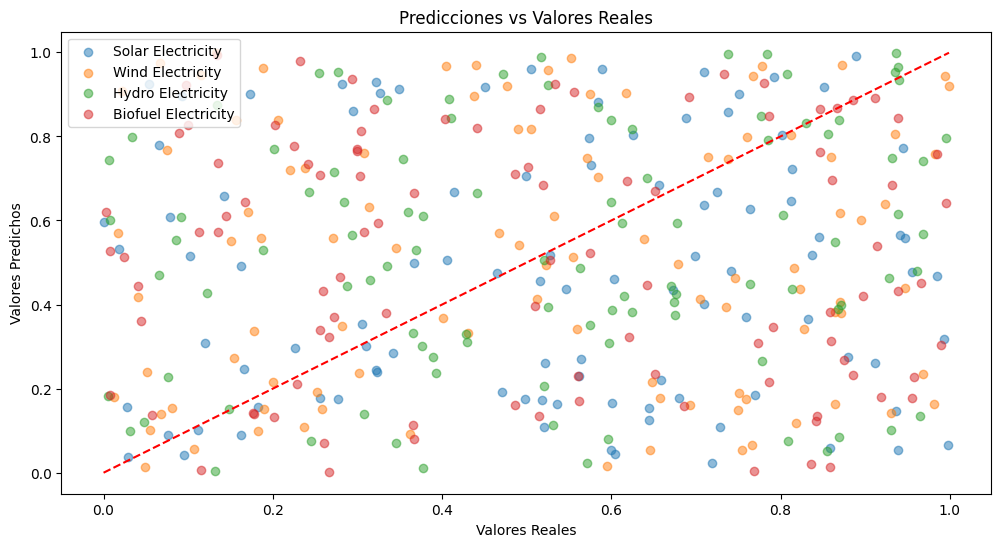

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulando datos para el ejemplo. Si ya tienes tus datos, omite esta parte.
data = pd.DataFrame({
    'solar_electricity': np.random.rand(100),  # 100 valores aleatorios
    'wind_electricity': np.random.rand(100),
    'hydro_electricity': np.random.rand(100),
    'biofuel_electricity': np.random.rand(100)
})

# Suponiendo que tienes predicciones para estos datos
y_pred = np.random.rand(100, 4)  # 100 predicciones para cada tipo de electricidad

# Ahora, graficar las predicciones vs los valores reales
plt.figure(figsize=(12, 6))

# Graficar para cada tipo de electricidad
plt.scatter(data['solar_electricity'], y_pred[:, 0], label='Solar Electricity', alpha=0.5)
plt.scatter(data['wind_electricity'], y_pred[:, 1], label='Wind Electricity', alpha=0.5)
plt.scatter(data['hydro_electricity'], y_pred[:, 2], label='Hydro Electricity', alpha=0.5)
plt.scatter(data['biofuel_electricity'], y_pred[:, 3], label='Biofuel Electricity', alpha=0.5)

# Línea de referencia
plt.plot([data.values.flatten().min(), data.values.flatten().max()], 
         [data.values.flatten().min(), data.values.flatten().max()], 'r--')

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [54]:
print(y_test)

print("Datos normalizados? ", y_test.min(), y_test.max())


[-4.72727003e-17  0.00000000e+00 -5.89998316e-17 ... -2.59505885e-01
 -4.64492000e-01 -4.31432166e-01]
Datos normalizados?  -0.5001554818702338 25.833470935916882


--------------------

VIF DataFrame:
                     feature        VIF
0                       year   5.050446
1                    country   5.850606
2                   iso_code   6.637149
3                 population   1.638627
4                        gdp   1.545658
5         electricity_demand   3.984686
6     electricity_generation   4.932573
7   electricity_share_energy   1.051998
8     energy_cons_change_twh   1.330973
9          energy_per_capita   1.257815
10            energy_per_gdp   1.256675
11         solar_consumption  38.143345
12          wind_consumption  37.112280
13       biofuel_consumption   5.229497
14     solar_cons_change_twh  24.593510
15      wind_cons_change_twh   7.962778
16   biofuel_cons_change_pct   1.006634
17          solar_share_elec   1.112929
18           wind_share_elec   1.152098


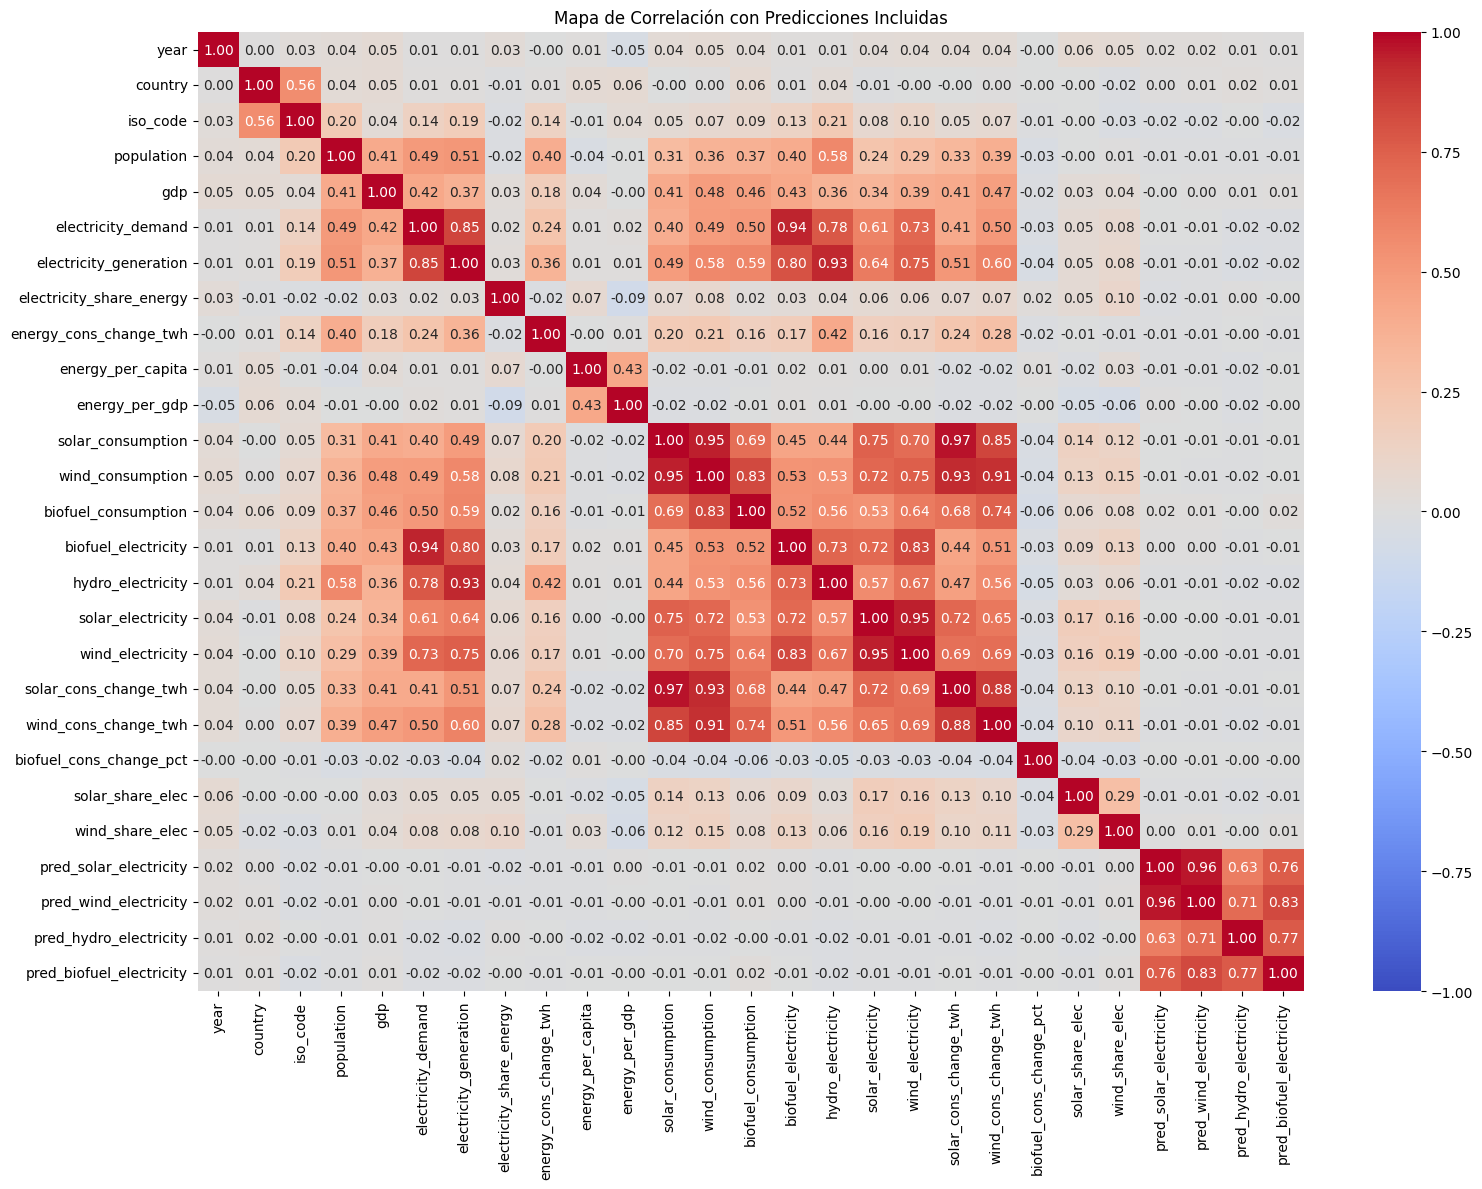

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from functions import load_and_clean_data
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar y limpiar datos
df = load_and_clean_data('data/raw/owid-energy-data.csv')

# 1. Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Transformar las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 2. Separar características y variables objetivo
target_columns = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor())

# 5. Entrenar el modelo
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Crear un DataFrame de las predicciones
predictions_df = pd.DataFrame(y_pred, columns=[f'pred_{col}' for col in target_columns])

# 8. Concatenar el DataFrame original y las predicciones
df_with_predictions = pd.concat([df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

# 9. Calcular la matriz de correlación
correlation_matrix_with_predictions = df_with_predictions.corr()

# 10. Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 11. Imprimir VIF
print("VIF DataFrame:")
print(vif_data)

# 12. Configuración del gráfico
plt.figure(figsize=(16, 12))

# 13. Crear el mapa de calor
sns.heatmap(correlation_matrix_with_predictions, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# 14. Personalizar el gráfico
plt.title("Mapa de Correlación con Predicciones Incluidas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# 15. Mostrar el gráfico
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
from functions import load_and_clean_data

# 1. Cargar y limpiar los datos
# Se asume que 'load_and_clean_data' maneja los nulos, selecciona las columnas correctas y escala los datos si es necesario.
df = load_and_clean_data('data/raw/owid-energy-data.csv')

# 2. Identificar columnas categóricas (por ejemplo, 'country', 'iso_code')
categorical_cols = df.select_dtypes(include=['object']).columns

# 3. Aplicar Label Encoding a las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transformar y sobreescribir
    label_encoders[col] = le  # Guardar el encoder por si se necesita revertir

# 4. Separar las características (X) y las variables objetivo (y)
# Asegúrate de que estas columnas existan en el DataFrame limpio
target_columns = ['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_electricity']
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor())

# 7. Entrenar el modelo
model.fit(X_train, y_train)

# 8. Realizar predicciones
y_pred = model.predict(X_test)

# Opcional: imprimir las predicciones
print(y_pred)



[[-4.72727003e-17  0.00000000e+00 -5.89998316e-17  0.00000000e+00]
 [-4.72727003e-17  0.00000000e+00 -5.89998316e-17  0.00000000e+00]
 [-4.72727003e-17  0.00000000e+00 -5.89998316e-17  0.00000000e+00]
 ...
 [-2.18149120e-01 -2.78476820e-01 -4.94031286e-01  0.00000000e+00]
 [-2.18149120e-01 -2.78476820e-01 -5.00055425e-01 -4.39231831e-01]
 [-2.16932944e-01 -2.59057348e-01 -4.66535489e-01 -4.31595959e-01]]


In [ ]:
print(df_encoded.columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import load_and_clean_data, split_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ruta del dataset (ajusta la ruta según sea necesario)
dataset_path = 'data/raw/owid-energy-data.csv'

# Cargar y limpiar los datos
df_clean = load_and_clean_data(dataset_path)

# Ver las primeras filas para asegurarnos de que los datos están limpios
print(df_clean.head(50))

# Definir las variables objetivo y características
X = df_clean.drop(columns=['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_consumption'])  # Características
y = df_clean[['solar_electricity', 'wind_electricity', 'hydro_electricity', 'biofuel_consumption']]  # Variables objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = MultiOutputRegressor(RandomForestRegressor())

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
for i, column in enumerate(y.columns):
    mse = mean_squared_error(y_test[column], y_pred[:, i])
    r2 = r2_score(y_test[column], y_pred[:, i])
    print(f"Modelo para {column}:")
    print(f" - MSE: {mse:.2f}")
    print(f" - R²: {r2:.2f}")
    print("")

# Opcional: Graficar las predicciones vs valores reales para visualización
plt.figure(figsize=(14, 10))

for i, column in enumerate(y.columns):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_test[column], y_pred[:, i], alpha=0.5)
    plt.plot([y_test[column].min(), y_test[column].max()], 
             [y_test[column].min(), y_test[column].max()], 'r--')  # Línea diagonal
    plt.title(f'Predicción vs Real para {column}')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import load_and_clean_data, split_data
from sklearn.preprocessing import LabelEncoder

# Ruta del dataset (ajusta la ruta según sea necesario)
dataset_path = 'data/raw/owid-energy-data.csv'

try:
    # Cargar y limpiar los datos
    df_clean = load_and_clean_data(dataset_path)
    print("Datos cargados y limpiados correctamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {dataset_path}")
    raise

# Ver las primeras filas para asegurarnos de que los datos están limpios
print(df_clean.head(50))

# Inicializar el codificador de etiquetas
label_encoder_country = LabelEncoder()
label_encoder_iso = LabelEncoder()

# Convertir columnas categóricas a variables numéricas utilizando codificación de etiquetas
df_clean['country'] = label_encoder_country.fit_transform(df_clean['country'])
df_clean['iso_code'] = label_encoder_iso.fit_transform(df_clean['iso_code'])

# Calcular la matriz de correlación con todas las columnas
correlation_matrix = df_clean.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 10})

# Añadir título
plt.title('Mapa de Correlación de Variables', fontsize=16)
plt.show()

# Convertir la matriz de correlación a texto
correlation_text = correlation_matrix.to_string()

# Imprimir el texto
print(correlation_text)

# Dividir el dataframe en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = split_data(df_clean)


TEST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import load_and_clean_data, split_data
from sklearn.preprocessing import LabelEncoder

# Ruta del dataset (ajusta la ruta según sea necesario)
dataset_path = 'data/raw/owid-energy-data.csv'

# Cargar y limpiar los datos
df_clean = load_and_clean_data(dataset_path)

# Ver las primeras filas para asegurarnos de que los datos están limpios
print(df_clean.head(50))

df = df_clean

# Inicializar el codificador de etiquetas
label_encoder_country = LabelEncoder()
label_encoder_iso = LabelEncoder()

# Convertir columnas categóricas a variables numéricas utilizando codificación de etiquetas
df['country'] = label_encoder_country.fit_transform(df['country'])
df['iso_code'] = label_encoder_iso.fit_transform(df['iso_code'])

# Calcular la matriz de correlación con todas las columnas
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añadir título
plt.title('Mapa de Correlación de Variables')
plt.show()

# Convertir la matriz de correlación a texto
correlation_text = correlation_matrix.to_string()

# Imprimir el texto
print(correlation_text)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import load_and_clean_data, split_data

In [ ]:
# Ruta del dataset (ajusta la ruta según sea necesario)
dataset_path = 'data/raw/owid-energy-data.csv'

# Cargar y limpiar los datos
df_clean = load_and_clean_data(dataset_path)

# Ver las primeras filas para asegurarnos de que los datos están limpios
print(df_clean.head(50))

df = df_clean


In [ ]:
# Supongamos que 'df' es tu dataframe original

# Convertir columnas categóricas a variables numéricas utilizando codificación one-hot
df_with_dummies = pd.get_dummies(df, drop_first=True)  # drop_first evita la trampa de la multicolinealidad

# Calcular la matriz de correlación con todas las columnas
correlation_matrix = df_with_dummies.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añadir título
plt.title('Mapa de Correlación de Variables')
plt.show()


In [ ]:
# Convertir la matriz de correlación a texto
correlation_text = correlation_matrix.to_string()

# Imprimir el texto
print(correlation_text)

In [ ]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añadir título
plt.title('Mapa de Correlación de Variables')
plt.show()

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = split_data(df)

# Imprimir las formas de los conjuntos de datos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
# Convertir la matriz de correlación a texto
correlation_text = correlation_matrix.to_string()

# Imprimir el texto
print(correlation_text)